In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [2]:
data=pd.read_csv('cleaned_mental_health_dataset.csv')

In [3]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Unknown,No,1,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,Unknown,No,0,Rarely,More than 1000,No,No,...,Unknown,Unknown,Maybe,No,No,No,No,No,Unknown,No
2,32,Male,Canada,Unknown,No,0,Rarely,6-25,No,Yes,...,Unknown,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Unknown,Yes,1,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Unknown,No,0,Never,100-500,Yes,Yes,...,Unknown,Unknown,No,No,Some of them,Yes,Yes,Yes,Unknown,No


In [4]:
selected_columns=['Age', 'Gender', 'Country', 'self_employed', 'family_history', 'work_interfere', 'no_employees', 'remote_work','benefits', 
                  'care_options', 'wellness_program','anonymity', 'leave', 'coworkers', 'supervisor']

In [5]:
X=data[selected_columns]
Y=data.treatment

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y)


In [7]:
numeric_features = ['Age']
categorical_features = x_train.columns.drop('Age').tolist()

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [13]:
final_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500))
])

In [14]:
final_pipeline.fit(x_train, y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Accuracy: 0.8446215139442231
Precision: 0.8188405797101449
Recall: 0.889763779527559
F1 Score: 0.8528301886792453
ROC-AUC: 0.9003048006096012

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       124
           1       0.82      0.89      0.85       127

    accuracy                           0.84       251
   macro avg       0.85      0.84      0.84       251
weighted avg       0.85      0.84      0.84       251



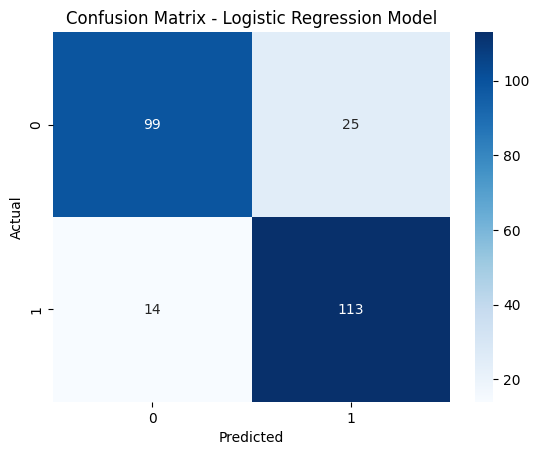

In [15]:
y_pred = final_pipeline.predict(x_test)
y_prob = final_pipeline.predict_proba(x_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.show()

In [16]:
joblib.dump(final_pipeline, "mental_health_model.joblib")
print("Model saved successfully!")

Model saved successfully!
